# Q1

### A.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO

amino_data = SeqIO.parse('MALGMALK1.fasta', 'fasta')
aminos = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', '-']
recoder = lambda x: aminos.index(x)
vfunc = np.vectorize(recoder)
seqs = np.array([record.seq for record in amino_data])
recoded_seqs = vfunc(seqs)

print(recoded_seqs)

[[20 10 18 ...  3 12  9]
 [ 0 14  2 ...  3 12  9]
 [16  8  4 ...  3 12  4]
 ...
 [16  8  4 ...  3 12  9]
 [ 9 11 14 ...  3 12 10]
 [11 13  8 ...  3 12  9]]


### B.
As we can see from the results below, MALG has a significatly higher entropy meaning that the MALG data posssesses a higher degree on uncertainty over the MALK data resulting in us having a lower probability of correctly predicting any further MALG data as oppose to MALK data.

In [2]:
from scipy.stats import entropy

transposed_seqs = recoded_seqs.T
freq_matrix = np.array([np.bincount(transposed_seqs[row_i])/len(transposed_seqs[row_i]) for row_i in range(len(transposed_seqs))])

entropy_by_col = np.array([entropy(row, base=2) for row in freq_matrix])
mean_MALG_entropy = np.mean(entropy_by_col[:177])
mean_MALK_entropy = np.mean(entropy_by_col[177:])

print('Mean MALG entropy:', mean_MALG_entropy, 'Mean MALK entropy:', mean_MALK_entropy)

Mean MALG entropy: 2.949385693320093 Mean MALK entropy: 1.6972734995818157


C:\Users\ruben\AppData\Local\Temp\ipykernel_12856\3834589603.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  freq_matrix = np.array([np.bincount(transposed_seqs[row_i])/len(transposed_seqs[row_i]) for row_i in range(len(transposed_seqs))])


### C.
As we can see from the matrix plot below, the mutual informational content is not uniformly distributed through the matrix. At $j = 20, 40, 120$ there are clear dark stripes stretching along all columns to signify a lower level of mutual information combined together with a similar dark but a narrower vertical stripe at $i=100$. This indicates that at these sites, there is a higher level of uncertainty between the data and a low dependence between the MALG and MALK sites. And the reverse is true for the yellowish green sites in the matrix. Also, as we can see from the histogram, the higher the bit count of the matrix elements, the lower their quantity in the matrix which is rather consistent with our observations from the matrix where there are stripes of high concentration of low mutual content entries and a more dispersed but a more consistent quantity of the high informational content matrix elements. The data from file 1 has a mean informational content of $\sim0.046$ bits which is quite low.

In [4]:
def info(i, j):
      col1 = transposed_seqs[:177][i]
      col2 = transposed_seqs[177:][j]
      bin_count = 50
      hist_mat = np.histogram2d(col1, col2, [bin_count, bin_count])[0]
      freq_flat = hist_mat.flatten()/len(col1)

      Hx, Hy = entropy_by_col[:177][i], entropy_by_col[177:][j]
      Hxy = entropy(freq_flat, base=2)
      return Hx + Hy - Hxy

N_rows = 177
N_cols = 142
info_mat = np.empty((N_rows, N_cols))
for i in range(N_rows):
      for j in range(N_cols):
            info_mat.itemset((i, j), info(i, j))
info_mat = info_mat.T

[[0.06501137 0.08086823 0.08315568 ... 0.02401694 0.02881699 0.03823823]
 [0.06091844 0.10864017 0.09993756 ... 0.02527741 0.03168138 0.04066167]
 [0.0437733  0.05913285 0.05620795 ... 0.01746924 0.01546148 0.017166  ]
 ...
 [0.00327863 0.00316036 0.0051537  ... 0.00095739 0.00064398 0.00067064]
 [0.02362487 0.02670203 0.03482099 ... 0.00533939 0.00573044 0.00917442]
 [0.03602012 0.05149786 0.05374243 ... 0.0136599  0.01754757 0.02187052]]


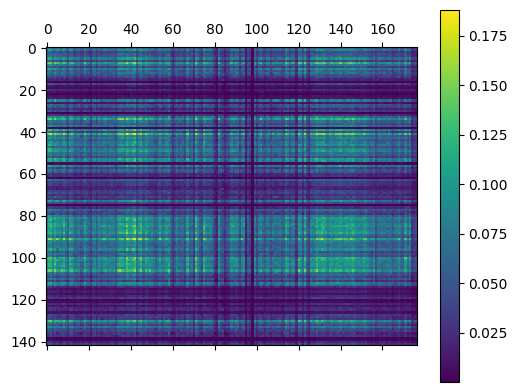

In [20]:
plt.matshow(info_mat)
plt.colorbar()
print(info_mat)
plt.show()

Mean informational content of file 1:  0.04606188406015028


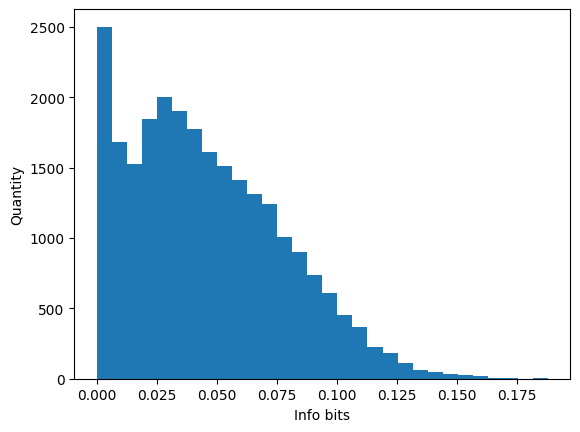

In [6]:
plt.hist(info_mat.flatten(), 30)
print('Mean informational content of file 1: ', np.mean(info_mat.flatten()))
plt.xlabel('Info bits')
plt.ylabel('Quantity')
plt.show()

### D.
As we can see from the mean entropy values for the file 2, they are exactly identical to the values in file 1. This is because permutations happen within the columns and this does not change the frequency of amino acids within a given coumn, ony their relative positions, and since the shannon enrtropy formula doesn't account for anything but frequencies, the entropies values in the same columns in different files are identical leading to identical mean entropy values. On the other hand, the mutual information formula does account for the permutations of amino acids throught the $H(x, y)$ term in the formula which result in different mutual information matrices for both files. File 2 has a mean informational content of $\sim0.2$ which is magnituted higher than that of file 1.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO

amino_data2 = SeqIO.parse('MALGMALK2.fasta', 'fasta')
aminos = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', '-']
recoder = lambda x: aminos.index(x)
vfunc = np.vectorize(recoder)
seqs2 = np.array([record.seq for record in amino_data2])
recoded_seqs2 = vfunc(seqs2)

print(recoded_seqs2)

[[20 10 18 ...  3 12  9]
 [ 0 14  2 ...  3 12  9]
 [16  8  4 ...  3 12  4]
 ...
 [16  8  4 ...  3 12  4]
 [ 9 11 14 ...  3 12  9]
 [11 13  8 ...  3 12  9]]


In [9]:
from scipy.stats import entropy

transposed_seqs2 = recoded_seqs2.T
freq_matrix2 = np.array([np.bincount(transposed_seqs2[row_i])/len(transposed_seqs2[row_i]) for row_i in range(len(transposed_seqs2))])

entropy_by_col2 = np.array([entropy(row, base=2) for row in freq_matrix2])
mean_MALG_entropy2 = np.mean(entropy_by_col2[:177])
mean_MALK_entropy2 = np.mean(entropy_by_col2[177:])

print('Mean MALG entropy:', mean_MALG_entropy2, 'Mean MALK entropy:' , mean_MALK_entropy2)

Mean MALG entropy: 2.949385693320093 Mean MALK entropy: 1.6972734995818157


C:\Users\ruben\AppData\Local\Temp\ipykernel_12856\416184249.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  freq_matrix2 = np.array([np.bincount(transposed_seqs2[row_i])/len(transposed_seqs2[row_i]) for row_i in range(len(transposed_seqs2))])


In [10]:
def info(i, j):
      col1 = transposed_seqs2[:177][i]
      col2 = transposed_seqs2[177:][j]
      bin_count = 50
      hist_mat = np.histogram2d(col1, col2, [bin_count, bin_count])[0]
      freq_flat = hist_mat.flatten()/len(col1)

      Hx, Hy = entropy_by_col2[:177][i], entropy_by_col2[177:][j]
      Hxy = entropy(freq_flat, base=2)
      return Hx + Hy - Hxy

N_rows = 177
N_cols = 142
info_mat2 = np.empty((N_rows, N_cols))
for i in range(N_rows):
      for j in range(N_cols):
            info_mat2.itemset((i, j), info(i, j))
info_mat2 = info_mat2.T

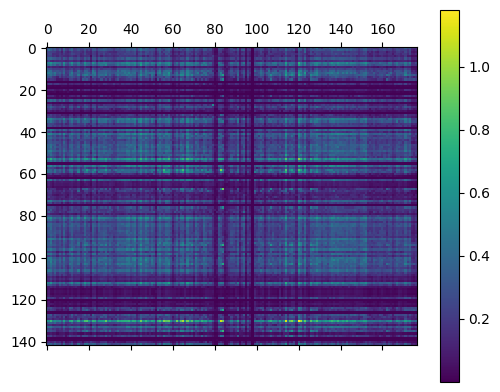

In [21]:
plt.matshow(info_mat2)
plt.colorbar()
plt.show()

Mean informational content of file 2:  0.1984561297559349


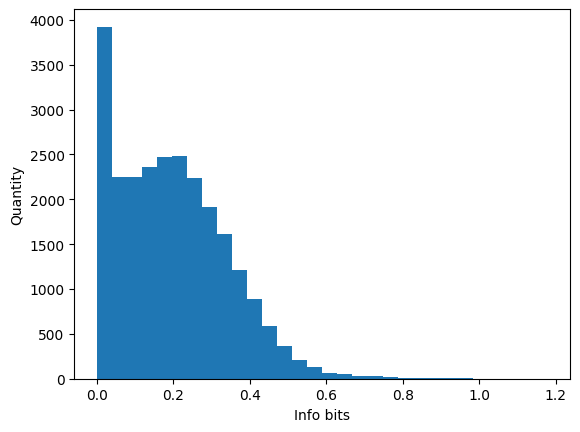

In [12]:
plt.hist(info_mat2.flatten(), 30)
print('Mean informational content of file 2: ', np.mean(info_mat2.flatten()))
plt.xlabel('Info bits')
plt.ylabel('Quantity')
plt.show()

### E.
Below, we can see the matrix of the difference of the mutual informations between the matrices from file 2 and file 1. As we can see from the colorbar, the values in the MI difference matrix are all positive hence the values of the file 2 matrix are higher than that of the file 1 which is further supported both by the histograms and the mean mutual information values, this leads us to believe that there is a higher uncertainty between the MALG and MALK data in file 1 than in file 2. Resulting in the first file being the scambled one as opposed to the second since it is a more unpredictable and uncertain data conflicting with our undertsnading of the interactions between the MALK and MALG proteins.

MI mean file 1: 0.04606188406015028 MI mean file 2: 0.1984561297559349


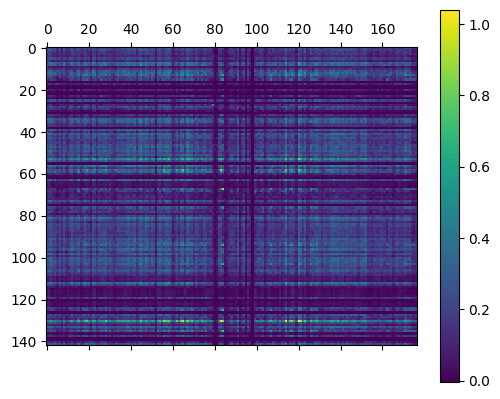

In [23]:
avg_info1 = info_mat.mean()
avg_info2 = info_mat2.mean()
print('MI mean file 1:', avg_info1, 'MI mean file 2:', avg_info2)
plt.matshow(-info_mat+info_mat2)
plt.colorbar()
plt.show()

### F.
From HW6 we have that $\langle \hat H(X)\rangle\sim H(X) -\alpha \dfrac{K}{N}$ where K are the possible values of $X$ and $N$ is the number of observations. In our case since every coumn is $5004$ charachters long, we have that $N=5004$ and since there are 20 amino acids and 1 gap symbol, we have $K=21$. Then the magnitude of the finite-size error on the entropy is $K/N=21/5004\sim 0.0042$.

While the finite-size effect for mutual information can be deduced from the entropies. $\langle \hat I(x, y)\rangle = \langle \hat H(x) + \hat H(y) - \hat H(x, y)\rangle = \langle \hat H(x)\rangle + \langle \hat H(y)\rangle - \langle \hat H(x, y)\rangle \sim H(x)-\alpha \dfrac{K}{N} + H(y) -\alpha \dfrac{K}{N} - \left[H(x, y) - \alpha \dfrac{K_{xy}}{N}\right]$. Notice that the $N$ is the same for both $H(x)$ and $H(y)$ and $H(x, y)$ since the number of datapoints/measurements is the same across all entropies while with $K_{xy}$ is in fact $K^2$ becausewe're working with two random variables, each one can take on $K$ values so together they can take in $K^2$ possible values.

So the above equality continuous as:
$ [H(x) + H(y) - H(x, y)] - \alpha \left[\dfrac{2K}{N} -\dfrac{K^2}{N}\right] = I(x, y) - \alpha \left[\dfrac{2K-K^2}{N}\right]$ so the mutual information finite size effect magnitude is $\dfrac{2K-K^2}{N}$. Using these calculations we get $-133/1668\sim -0.08$. As we can see from the result, the error magnitude for entropy is quite a bit lower than that of the mutual information.

As we can see in the case of the mutual information error magnitude, the estimate average values we've calculated should be approximatelly lower than the actual values. Even more importantly the actual value of the file 1 MI mean is less than the abosolute value of the error magnitude, unlike the file 2 where the error doesn't change too much.

### G.
Both aminoacids MALG and MALK are part of the MalEFGK complex involved in maltose/maltodextrin import. MALG is responsible for the translocation of the substrate across the membrane. While MALK is responsible for energy coupling to the transport system as per their decribed functions on UniProt. There are major differences in the operations of the MalEFGK complex and the HK-RR cmplex. The first is designed to transfer maltose from the outside of the cell into the inside while on the other hand, HK-RR complex is designed for transmitting a signal from the outter environment into the cell, nothing physically enters the cell. Even though structurally the two complexes are completely different, they do serve a similar purpose of taking external events and passing them through the cellular membrane even though the first complex is ensuring energy security of the cell while the second complex is in chanrge of "decision making" based on external stimuli. We would expect the high entropy sites to be the ones responsible for the substrate recognition.

### H.
If we were given only a scarambled file, one very straight forward, but also $O(n^2)$ inefficient, way of finding the right partner for each MALG is by calculating the mutual information matrices for each possible permutation of sequence pairs (this would be $5004^2$ matrices) and for each matrix calculate the mean mutual information and take the one with the maximum mean. This will yield the matrix with the highest mutual informational content and thus whichever permutation generated this matrix contains the right pairs of MALG and MALK proteins.

# Q2

##### A.
The probability that the two sequences will differ by $n$ nucleotides out of the $L$ is a Binomial distribution of the form $P(n) = {L\choose n} [3p(d)]^n\cdot[1-3p(d)]^{L-n}$. Where $3p(d)$ is the probability of a nucleotide mutating with a $d$ distance.

### B.

In order for us to find the best $d$ value through the maximum likelihood method, we will assume a uniform prior for the model and utilize the ratio of posteriors to find the best $d$. The ratio of posteriors yields $\frac{P(model|data)}{P(model'|data)} = \frac{P(data|model)}{P(data|model')}\times\frac{P(model)}{P(model)}$. Since we're assuming uniform prior, the last ratios in the equation will be 1. Hence to find the largest posterior, we only need to find the largest prior. For that, we'll turn $P(n)$ into a function with respect to $d$ and find the maxium.

Before we proceed to the main part, we'll take the derivative of $p(d)$, which will come in handy later on, $p'(d) = \frac13 e^{-\frac43 d} > 0, \, \forall d\in\mathbb{R}$.

Let $\phi(d) = [P(n)](d)$, for the purposes of convenience, we will set $q = 3p(d)$ and so the derivative is as follows:

$\phi'(d) = {L\choose n} [n q^{n-1} q' (1-q)^{L-n} - (L-n)q^n q'(1-q)^{L-n-1}]$ where $q$ ans $q'$ are functions in terms of $d$. Setting $\phi'(d=0)$ yields:

$n q^{n-1} q' (1-q)^{L-n} = (L-n) q^n q' (1-q)^{L-n-1}$ where as mentioned above $q' = p'(d)>0$ and $q = p(d)>0$ for $d>0$ which is clearly the case as then $P(d)$ would be 0. The above equation simplifies to $n(1-q) = q (L-n) \implies n-nq=(L-n)q \implies q=n/L$. Hence we get that the largest $\phi(d)$ is when $3p(d)=m/L$. Subsituting this in the defintion of $p(d)$ and rearranging for $d$ yields:

$m/L = -\frac34 e^{-\frac43 d} + \frac34 \implies (1-\frac43 \frac{m}{L}) = e^{-\frac43 d}\implies \ln(1-\frac43 \frac{m}{L}) = -\frac43 d \implies d=-\frac34 \ln(1-\frac43 \frac{m}{L})$ as needed.

### C.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO

nucleos_data = SeqIO.parse('BetaLactamase.fasta', 'fasta')
nucleos = ['A', 'C', 'G', 'T']
recoder_nucleo = lambda x: nucleos.index(x)
vfunc = np.vectorize(recoder_nucleo)
nucleos_seqs = np.array([record.seq for record in nucleos_data])
recoded_nucleos_seqs = vfunc(nucleos_seqs)

def distance(i, j):
      seq1, seq2 = recoded_nucleos_seqs[i], recoded_nucleos_seqs[j]
      n = np.count_nonzero(seq1 - seq2)
      L = len(seq1)
      return -3/4*np.log(1-4/3*n/L)

d01 = distance(0, 1)
d02 = distance(0, 2)
d12 = distance(1, 2)

print('d01:', d01, '| d02:', d02, '| d12:', d12)

d01: 0.4408399986765892 | d02: 0.9680175153055719 | d12: 0.9005563378083672


### D.
Since the above results yield that $d01\sim 0.5$ while $d02, d12\sim 1$ then we see that 0 and 1 are close while 2 is twice as far from either one. Hence, we can infer that the tree of these three sequences in fact corresponds to the A in Fig.1

### E.
Notice that in the problem setup, $p(d)$ is the probability of the descendent of a given nucleotide to be a nucleotide of a different type after $d$ time. This probability is in its essance $P(N^{(1)}_i | N^{(1)}_j, d)$ for $i\not=j$, then $P(N^{(1)}_i | N^{(1)}_j, d) = p(d) = -\frac14 e^{-\frac43 d} + \frac14$ subsequently, $P(N^{(1)}_i | N^{(1)}_i, d) = \frac34 e^{-\frac43 d} + \frac14$ 

### F.
As we see from the computations below, the term that is the most likely is $x=G$ and $y=G$ this is because all three first sites of the sequences are $G$ and since the distance is very small at $d=0.01$ the likelyhood of a mutation to a different nucleotide is $3\cdot p(0.01) \sim 0.001$ while the probability of retaining the same nucleotide is almost 1.

In [30]:
def likelihood_f_A(site, d=0.2):
      def P(Nx, Ny, d):
            if Nx == Ny:
                  return 3/4 * np.exp(-4/3 * d) + 1/4
            else:
                  return -1/4 * np.exp(-4/3 * d) + 1/4

      likelihood = 0
      N0 = recoded_nucleos_seqs[0][site]
      N1 = recoded_nucleos_seqs[1][site]
      N2 = recoded_nucleos_seqs[2][site]
      max_term = [P(N0, 0, d)*P(N1, 0, d)*P(0, 0, d)*P(N2, 0, 2*d), (0, 0)]

      for Nx in range(4):
            for Ny in range(4):
                  term = P(N0, Nx, d)*P(N1, Nx, d)*P(Nx, Ny, d)*P(N2, Ny, 2*d)
                  if term > max_term[0]:
                        max_term[0], max_term[1] = term, (Nx, Ny)
                  likelihood += term
      return likelihood/4, max_term

likelihood = likelihood_f_A(0, d=0.01)
print("likelihood:", likelihood[0], "max term:", (likelihood[1][1]), "max term val:", likelihood[1][0] )

likelihood: 0.23785129358139867 max term: (2, 2) max term val: 0.9513407947523853


### G.
As stated in the setup of the problem, the sites are independent of each other, hence in this case, the probabilities split along multiplications.

$L=P(\{N_0^{(1)}, N_1^{(1)}, N_2^{(1)}\},..., \{N_0^{(n)}, N_1^{(n)}, N_2^{(n)}\}) = P(\{N_0^{(1)}, N_1^{(1)}, N_2^{(1)}\}) \times ...\times P(\{N_0^{(n)}, N_1^{(n)}, N_2^{(n)}\}) = L^{(1)} \times...\times L^{(n)}$ where $n$ is the length of the sequences

### H.

The value of the log-likelihood is around $-1123.6$ which means that the value of the actual likelihood is $\sim e^{-1123.6}$ which is extremely small and the likelihood of getting this data was near zero. It is so small in fact that we needed to apply the natural logarithm to the multplication (and turn it into addition of logarithms) as the poduct of all individual likelihoods is less than the machine epsilon of the computer which results in the computer interpreting it as 0. Besides our inability to evalue that raw likelihood, addition is significatly more numerically stable than multiplication.

In [31]:
def log_likelihood():
      likelihoods_A = []
      n = len(recoded_nucleos_seqs[0])
      d = 0.2
      for site in range(n):
            likelihoods_A.append(np.log(likelihood_f_A(site, d)[0]))
      likelihoods_A = np.array(likelihoods_A)
      return np.sum(likelihoods_A)

print('Tree A log likelihood:', log_likelihood())

Tree A log likelihood: -1123.6245286845178


### I.
As we can see from the data below, tree A is the one with the maximum likelihood. It has a significant lead over the other two trees. B and C, in fact, are much closer to each other than they are to A and it would be an even more unlikely for the data to be generated by B or C, especially considering that we're operating on a logarithmic scale.

In [33]:
def likelihood_f_B(site, d=0.2):
      def P(Nx, Ny, d):
            if Nx == Ny:
                  return 3/4 * np.exp(-4/3 * d) + 1/4
            else:
                  return -1/4 * np.exp(-4/3 * d) + 1/4

      likelihood = 0
      N0 = recoded_nucleos_seqs[0][site]
      N1 = recoded_nucleos_seqs[1][site]
      N2 = recoded_nucleos_seqs[2][site]
      max_term = [P(N0, 0, d)*P(N2, 0, d)*P(0, 0, d)*P(N1, 0, 2*d), (0, 0)]

      for Nx in range(4):
            for Ny in range(4):
                  term = P(N0, Nx, d)*P(N2, Nx, d)*P(Nx, Ny, d)*P(N1, Ny, 2*d)
                  if term > max_term[0]:
                        max_term[0], max_term[1] = term, (Nx, Ny)
                  likelihood += term
      return likelihood/4, max_term

def likelihood_f_C(site, d=0.2):
      def P(Nx, Ny, d):
            if Nx == Ny:
                  return 3/4 * np.exp(-4/3 * d) + 1/4
            else:
                  return -1/4 * np.exp(-4/3 * d) + 1/4

      likelihood = 0
      N0 = recoded_nucleos_seqs[0][site]
      N1 = recoded_nucleos_seqs[1][site]
      N2 = recoded_nucleos_seqs[2][site]
      max_term = [P(N1, 0, d)*P(N2, 0, d)*P(0, 0, d)*P(N0, 0, 2*d), (0, 0)]

      for Nx in range(4):
            for Ny in range(4):
                  term = P(N1, Nx, d)*P(N2, Nx, d)*P(Nx, Ny, d)*P(N0, Ny, 2*d)
                  if term > max_term[0]:
                        max_term[0], max_term[1] = term, (Nx, Ny)
                  likelihood += term
      return likelihood/4, max_term

In [49]:
def log_likelihood(tree, d=0.2):
      trees = {'A':likelihood_f_A, 'B':likelihood_f_B, 'C':likelihood_f_C}
      likelihoods_a = []
      n = len(recoded_nucleos_seqs[0])
      for site in range(n):
            likelihoods_a.append(np.log(trees[tree](site, d)[0]))
      likelihoods_a = np.array(likelihoods_a)
      return np.sum(likelihoods_a)

print('Tree A log likelihood:', log_likelihood('A'))
print('Tree B log likelihood:', log_likelihood('B'))
print('Tree C log likelihood:', log_likelihood('C'))

Tree A log likelihood: -1123.6245286845178
Tree B log likelihood: -1187.907696174121
Tree C log likelihood: -1181.9738653289269


### J.
As we can see from the graph, the maximum is reached at 0.2 and as calculated in the prior questions, the likelihood when $d=0.2$ is $-1123.6$. It sharply increases from $0$ to $0.2$ as the likelihood increases only to start slowly falling again and to later asyptotically stabilize to around $-1285$ (I ran the numbers beyond $d=1$) as the individual conditional probabilities stabilize to $1/4$. Hence, the best branch length is $0.2$.

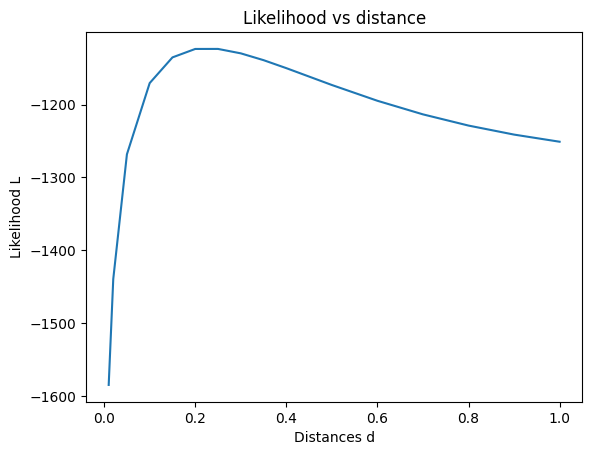

In [51]:
distances_A = np.array([0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
likelihoods_A = np.array([log_likelihood('A', d) for d in distances_A])

plt.plot(distances_A, likelihoods_A)
plt.title("Likelihood vs distance")
plt.xlabel("Distances d")
plt.ylabel("Likelihood L")
plt.show()